In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_data = pd.read_csv('c:/data/sentiment/train.tsv',sep='\t')
test_data = pd.read_csv('c:/data/sentiment/train.tsv',sep='\t')


In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


# create new column with if and for loop with the Sentiment Phrase column


In [6]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

# count values of Sentiment Phrase

In [7]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

positive              9206
somewhat negative    79582
negative              7072
somewhat positive    32927
neutral              27273
dtype: int64

# some visually for Sentiment phrase

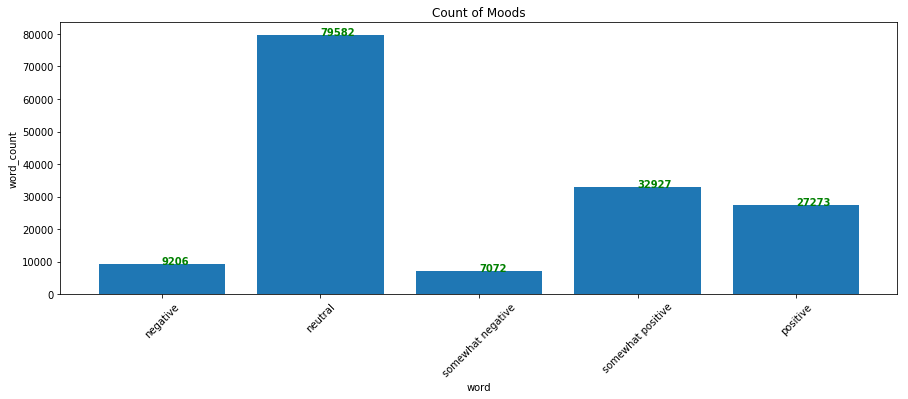

In [8]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')


# function to clean the column Phrase in the data set


In [9]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))


# run the function in train and test data set


In [10]:
corpus= []
for i in range(0, 156060):
    corpus.append(review_to_words(train_data['Phrase'][i]))

In [11]:
corpus1= []
for i in range(0, 156060):
    corpus1.append(review_to_words(train_data['Phrase'][i]))

# create new column and merge it with the new cleaning list 

In [12]:
train_data['new_Phrase']=corpus


# drop the old column

In [13]:
train_data.drop(['Phrase'],axis=1,inplace=True)

In [14]:
train_data.head()

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_Phrase
0,1,1,1,neutral,series escapade demonstrating adage good goose...
1,2,1,2,somewhat negative,series escapade demonstrating adage good goose
2,3,1,2,somewhat negative,series
3,4,1,2,somewhat negative,
4,5,1,2,somewhat negative,series


# i do it with positive Sentiment and easly o reapte it to the rest of Sentiment words 

# select positive Sentiment from data set 

In [15]:
positive=train_data[train_data['Sentiment_words']==('positive')]

# prepare the data to split it 

In [16]:

words = ' '.join(positive['new_Phrase'])
split_word = " ".join([word for word in words.split()])

# prepare the data to visual  it 

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

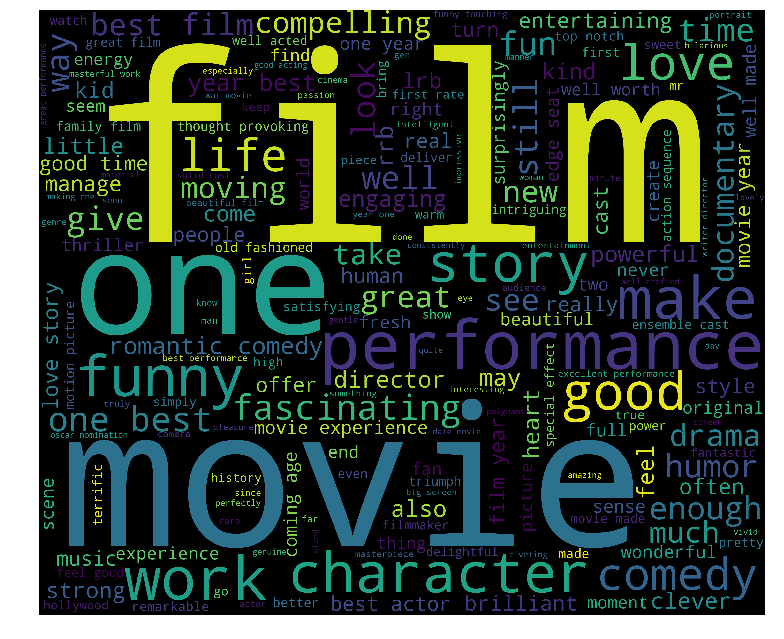

In [18]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# now here some steps to count every word in postive Sentiment 

In [19]:
pos=positive['new_Phrase']

In [20]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 

In [21]:
pos_words = vectorizer.fit_transform(pos)


In [22]:
pos_words = pos_words.toarray()

In [23]:
pos= vectorizer.get_feature_names()

In [24]:
pos

['ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'accept',
 'accessible',
 'acclaim',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishment',
 'accurate',
 'achievement',
 'achieves',
 'achingly',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actually',
 'acute',
 'adam',
 'adaptation',
 'add',
 'addition',
 'admirable',
 'admire',
 'adorably',
 'adorns',
 'adrenalin',
 'adrenaline',
 'adult',
 'adventure',
 'adventurous',
 'aerial',
 'affecting',
 'affection',
 'affirming',
 'affirms',
 'age',
 'agenda',
 'aggrandizing',
 'ago',
 'ahead',
 'aimed',
 'air',
 'alike',
 'alive',
 'allegory',
 'allen',
 'allows',
 'alluring',
 'almost',
 'alone',
 'along',
 'also',
 'alternately',
 'always',
 'amazing',
 'amazingly',
 'ambiguity',
 'ambitious',
 'america',
 'american',
 'among',
 'amount',
 'amused',
 'amusing',
 'anchor',
 'anderson',
 'angst',
 'animal',
 'animated',
 'animation',
 'anime',
 'another',
 'answer',
 'antic',
 'anybod

In [25]:
print (pos_words.shape)


(9206, 2000)


In [26]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count) 

ability 20
able 32
absolute 9
absolutely 24
absorbing 18
accept 10
accessible 16
acclaim 9
accomplish 5
accomplished 23
accomplishes 7
accomplishment 17
accurate 9
achievement 30
achieves 5
achingly 7
across 12
act 29
acted 43
acting 101
action 93
actor 130
actress 14
actually 45
acute 8
adam 7
adaptation 22
add 17
addition 13
admirable 16
admire 7
adorably 7
adorns 7
adrenalin 6
adrenaline 6
adult 35
adventure 54
adventurous 17
aerial 7
affecting 9
affection 11
affirming 10
affirms 5
age 84
agenda 7
aggrandizing 7
ago 9
ahead 10
aimed 5
air 10
alike 5
alive 20
allegory 7
allen 15
allows 19
alluring 7
almost 50
alone 8
along 29
also 88
alternately 6
always 43
amazing 35
amazingly 11
ambiguity 6
ambitious 18
america 18
american 63
among 19
amount 16
amused 9
amusing 57
anchor 6
anderson 6
angst 10
animal 10
animated 28
animation 24
anime 6
another 43
answer 11
antic 7
anybody 5
anyone 35
anything 31
apart 8
apex 5
aplomb 11
apocalypse 8
apparent 6
appeal 15
appealing 27
appear 8
appreci

monster 14
month 6
monty 8
monumental 8
mood 22
moore 15
moral 15
mostly 17
mother 19
motion 34
motivated 7
mouse 6
mouth 9
move 14
movie 757
moviegoing 5
moviemaking 14
moving 131
mr 27
much 126
multi 5
multilayered 5
multiple 5
murder 8
murphy 8
music 81
musical 11
musician 8
must 30
mysterious 10
mystery 23
mystical 5
mythic 6
nair 9
name 7
namesake 6
narrative 33
narrator 5
national 8
natural 23
naturalistic 5
naturally 10
nature 19
natured 8
near 11
nearly 22
need 24
nerve 10
never 98
new 115
newcomer 20
news 8
next 18
nice 18
nicely 28
niche 8
nicholson 10
night 6
niro 6
noble 5
noir 6
nominated 10
nomination 19
non 16
nonchalant 5
nonstop 7
nostalgic 6
notch 25
note 8
noteworthy 7
nothing 32
nourishing 5
novel 12
noyce 6
nuance 7
number 14
observation 16
obvious 5
occasionally 18
odd 13
oddly 8
odds 10
ode 9
offbeat 22
offer 43
offering 8
often 93
old 57
one 517
open 13
openness 8
opera 18
opportunity 5
order 11
ordinary 7
oriented 12
original 65
originality 34
orlando 6
oscar 6

In [27]:
postive_new= pd.DataFrame(dist)

In [28]:
postive_new.columns=['word_count']

In [29]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [30]:
postive_new1=postive_new[['word','word_count']]

In [31]:
postive_new1.head()

,word,word_count
0,ability,20
1,able,32
2,absolute,9
3,absolutely,24
4,absorbing,18


In [32]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [33]:
top_30_words.head(30)

,word,word_count
652,film,1104
1149,movie,757
1223,one,517
1280,performance,472
161,best,394
715,funny,347
760,good,339
1933,well,317
1672,story,280
1990,year,275


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values


# time to predict

# using multinomial Naive Bayes due it is  go good for discrete features , in our case we have 5 features 

In [35]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)







C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
mse = ((y_pred - y_test) ** 2).mean()



In [37]:
#mean square error 

In [38]:
mse

0.64737921312315772

In [39]:
rmse = sqrt(mse)

In [40]:
#root mean squre error

In [41]:
rmse

0.8045987901576522